In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## 1. Impementing the given image transformation

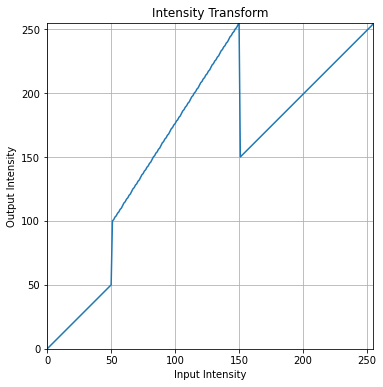

In [3]:
c = np.array([(50,50),(50,100),(150,255),(150,150)])
t1 = np.linspace(0, c[0,1], c[0,0]+1-0).astype('uint8')
# print(t1)
t2 = np.linspace(c[1,1], c[2,1], c[2,0] - c[1,0]).astype('uint8')
# print(t2)
t3 = np.linspace(c[3,1], 255, 255 - c[3,0]).astype('uint8')
# print(len(t3))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
# print(len(transform))
fig , ax = plt.subplots()
fig.set_size_inches(6,6)
ax.plot(transform)
ax.grid(True)
ax.set_title('Intensity Transform')
ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('1_transform.png')
plt.show()

In [4]:
img_orig=cv.imread ('images/emma.jpg',cv.IMREAD_GRAYSCALE)
assert img_orig is not None
cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.imshow("Image",img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig,transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

## 2. Apply point intensity operations to accentuate,

### 2.1 White matter

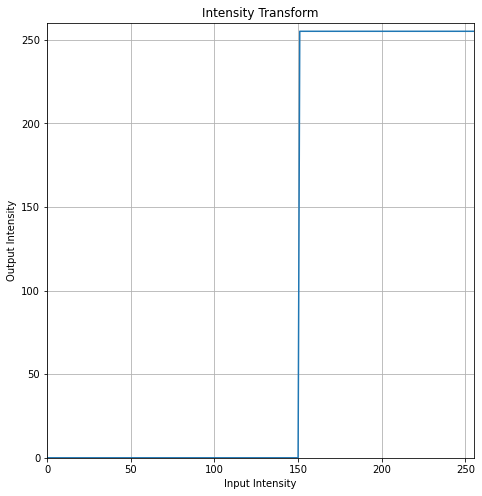

In [5]:
c = np.array([(0,150),(150,255)])
t1 = np.linspace(0, c[0,0], c[0,1]+1-0).astype('uint8')
#print(t1)
t2 = np.linspace(c[1,1], 255, 255 - c[1,0]).astype('uint8')
#print(t2)
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
# print(len(transform))
fig , ax = plt.subplots()
fig.set_size_inches(8,8)
ax.plot(transform)
ax.grid(True)
ax.set_title('Intensity Transform')
ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,260)
ax.set_aspect('equal')
plt.savefig('2_1_white_matter_transform.png')
plt.show()

In [7]:
img_orig=cv.imread ('images/BrainProtonDensitySlice9.png',cv.IMREAD_GRAYSCALE)
assert img_orig is not None
cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.imshow("Image",img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig,transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

### 2.2 Gray matter

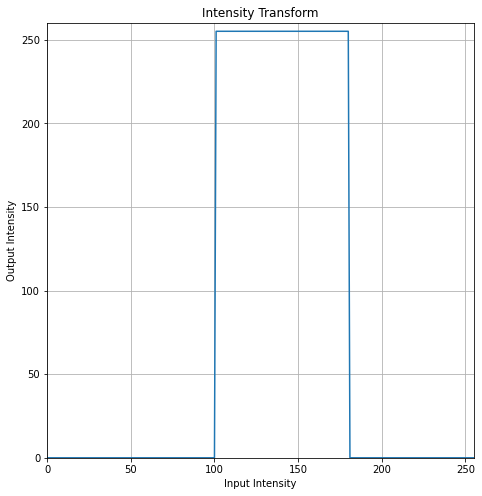

In [8]:
c = np.array([(0,100),(100,255),(180,255)])
t1 = np.linspace(0, c[0,0], c[0,1]+1-0).astype('uint8')
#print(t1)
t2 = np.linspace(c[1,1],c[2,1],c[2,0] - c[1,0] ).astype('uint8')
#print(t2)
t3 = np.linspace(0, 0, 255 - c[2,0]).astype('uint8')
#print(t3)
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
# print(len(transform))
fig , ax = plt.subplots()
fig.set_size_inches(8,8)
ax.plot(transform)
ax.grid(True)
ax.set_title('Intensity Transform')
ax.set_xlabel('Input Intensity')
ax.set_ylabel('Output Intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,260)
ax.set_aspect('equal')
plt.savefig('2_2_gray_matter_transform.png')
plt.show()

In [9]:
img_orig=cv.imread ('images/BrainProtonDensitySlice9.png',cv.IMREAD_GRAYSCALE)
assert img_orig is not None
cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.imshow("Image",img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig,transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

## 3.

### 3.1 Gamma correction to the L plane

In [10]:
img_orig = cv.imread ('images/highlights_and_shadows.jpg',cv.IMREAD_COLOR)
gamma = 2
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_orig = cv.cvtColor(img_orig , cv.COLOR_BGR2LAB)

#extract L channel
L_plane = img_orig[:,:,0]

L_plane_gamma = cv.LUT(L_plane, table)
img_gamma = img_orig.copy()
img_gamma[:,:,0] = L_plane_gamma

### 3.2 Histograms of the original and gamma corrected images

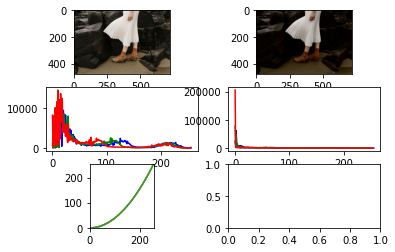

In [11]:
img_orig = cv.cvtColor(img_orig , cv.COLOR_LAB2RGB)
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_LAB2RGB)

f,axarr = plt.subplots(3,2)
axarr[0,0].imshow(img_orig)
axarr[0,1].imshow(img_gamma)
color=('b','g','r')
for i,c in enumerate(color):
    hist_orig = cv.calcHist([img_orig],[i],None,[256],[0, 256])
    axarr[1,0].plot(hist_orig,color=c)
    hist_gamma = cv.calcHist([img_gamma], [i], None,[256],[0, 256])
    axarr[1,1].plot(hist_gamma , color=c)
    axarr[2,0].plot(table)
    axarr[2,0].set_xlim(0,255)
    axarr[2,0].set_ylim(0,255)
    axarr[2,0].set_aspect('equal')

## 4. Aplying an intensity transformation to the saturation plane

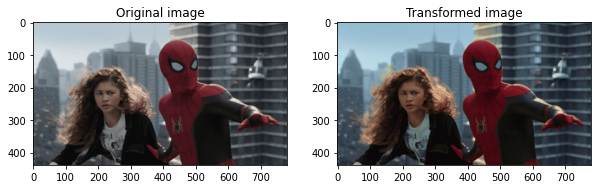

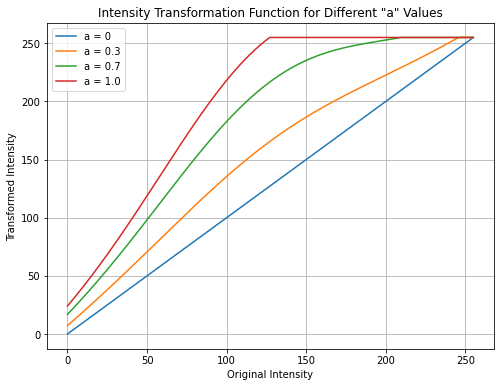

In [34]:
# Load the image in BGR color space
image_bgr = cv.imread('images/spider.png', cv.IMREAD_COLOR)

# Convert the BGR image to HSV color space
image_hsv = cv.cvtColor(image_bgr, cv.COLOR_BGR2HSV)

# Extract the saturation (S) plane
saturation_plane = image_hsv[:, :, 1]
#print(saturation_plane)

# Define the intensity transformation function
def intensity_transform(x, a, sigma=70):
    f_x = np.clip(x+a*128*np.exp(-(x-128)**2/(2*sigma**2)), 0, 255) #.astype(np.uint8)
    return f_x

# Apply the intensity transform function
transforemed_saturation_plane = intensity_transform(saturation_plane, 0.3)
#print(intensity_transform(saturation_plane, 1))

image_copy = image_hsv.copy()
# recombine the planes
image_copy[:, :, 1] = transforemed_saturation_plane

# Convert the HSV image back to BGR color space
original_image = cv.cvtColor(image_hsv, cv.COLOR_HSV2RGB)
transformed_image = cv.cvtColor(image_copy, cv.COLOR_HSV2RGB)

# Display the images and plots
f, axarr = plt.subplots(1, 2, figsize=(10, 5))
axarr[0].imshow(original_image)
axarr[0].set_title('Original image')
axarr[1].imshow(transformed_image)
axarr[1].set_title('Transformed image')


intensity_values = np.arange(256)
a_values = [0, 0.3, 0.7, 1.0]
plt.figure(figsize=(8, 6))

for a in a_values:
    transformation_values = intensity_transform(intensity_values, a)
    plt.plot(intensity_values, transformation_values, label=f'a = {a}')

plt.title('Intensity Transformation Function for Different "a" Values')
plt.xlabel('Original Intensity')
plt.ylabel('Transformed Intensity')
plt.legend()
plt.grid(True)
plt.show()


## 5. Histogram Equalization

In [38]:
def histogram_equalization(im):
    """
    Histogram Equalization
    :param img: input image
    :return: histogram equalized image
    """
    img = cv.imread('images/'+im,cv.IMREAD_GRAYSCALE)

    hist,bins = np.histogram(img.ravel(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.title('Histogram for gray scale picture')
    plt.show()
    equ = cv.equalizeHist(img)
    hist,bins = np.histogram(equ.ravel(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(equ.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.title('Histogram of the Equalized Image')
    plt.show()
    res = np.hstack((img,equ)) #stacking images side-by-side    
    plt.axis('off')
    plt.imshow(res,cmap='gray')



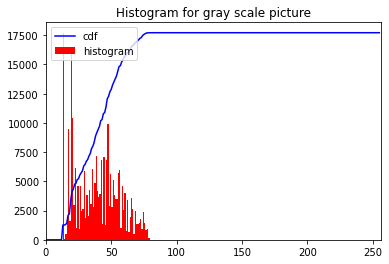

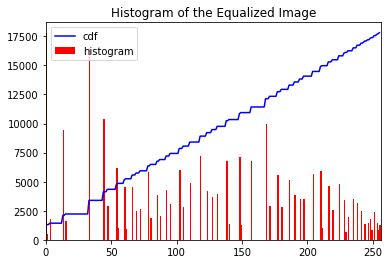

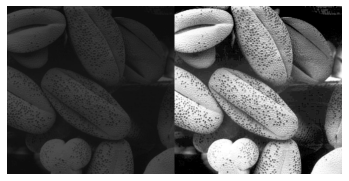

In [40]:
histogram_equalization('shells.tif')

## 6. Histogram equalization to the foreground

### 6.1

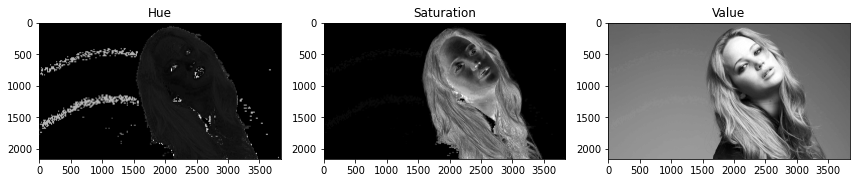

In [43]:
# Load the image
image = cv.imread('images/jeniffer.jpg')

# Convert the image to HSV
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the HSV image into H, S, and V components
hue = hsv_image[:, :, 0]
saturation = hsv_image[:, :, 1]
value = hsv_image[:, :, 2]

# Display the H, S, V planes in grayscale
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(hue, cmap='gray')
plt.title('Hue')

plt.subplot(1, 3, 2)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation')

plt.subplot(1, 3, 3)
plt.imshow(value, cmap='gray')
plt.title('Value')

plt.tight_layout()
plt.show()


### 6.2